In [ ]:
"""
Outcome 2
Enrollment of high school graduate to university. 

1. Total enrollment in 2 year and 4 year program
2. Total enrollment in 2 year and 4 year program in normalized form to compare both
3. Enrollment based on gender (multibar chart)
4. Enrollment based on gender with 2 year and 4 year program (multi and stack bar chart)
"""

Data:
[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Total_enrolled_to_uni [1475, 1615, 1458, 1589, 1585, 1559, 1523, 1648, 1569, 1562, 1663, 1539, 1499, 1503, 1575, 1460, 1420, 1423, 1483, 1467, 1559, 1609, 1729, 1856, 1844, 1822, 1745, 1574, 1824, 1711, 1834, 1834, 1776, 1985, 2162, 2058, 2152, 2101, 2121, 1962, 1961, 2053, 2189]
TwoY_enrolled_to_uni [471, 578, 465, 549, 538, 554, 599, 626, 592, 569, 585, 523, 536, 499, 584, 508, 476, 566, 551, 535, 530, 559, 615, 630, 685, 610, 589, 500, 604, 574, 618, 642, 665, 711, 872, 813, 842, 797, 921, 709, 706, 749, 744]
FourY_enrolled_to_uni [1004, 1037, 993, 1040, 1048, 1006, 924, 1023, 977, 993, 1078, 1017, 962, 1004, 991, 952, 945, 857, 932, 932, 1029, 1050, 1115, 1226, 1159, 1213, 1156, 1074, 1220, 1137, 1217, 1192, 1111, 1274, 1

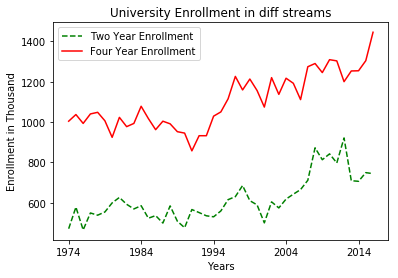

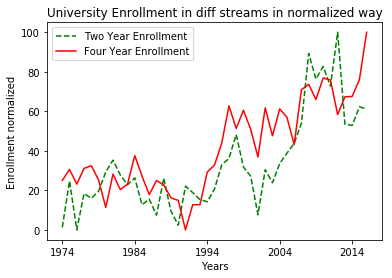

In [61]:
import MySQLdb
import matplotlib.pyplot as plt
import numpy as np

conn = MySQLdb.connect(host="localhost", user="mehtake", passwd="info501", db="sp18i501_5")
cursor = conn.cursor()
cursor.execute('SELECT year, High_School_Completer,Per_enrolled_to_college_Total, Two_Year, Four_Year,\
ROUND(Per_enrolled_to_college_Total * High_School_Completer/ 100) AS Total_enrolled_to_college,\
ROUND(Two_Year * High_School_Completer/ 100) AS TwoY_enrolled_to_college,\
ROUND(Four_Year * High_School_Completer/ 100) AS FourY_enrolled_to_college FROM university_enrollment_2 WHERE year > 1973');
data = cursor.fetchall()        #gives the resultset
cursor.close()

year = []
Total_enrolled_to_uni = []
TwoY_enrolled_to_uni = []
FourY_enrolled_to_uni = []


for row in data:
    year.append(row[0])
    Total_enrolled_to_uni.append(int(row[5]))
    TwoY_enrolled_to_uni.append(int(row[6]))
    FourY_enrolled_to_uni.append(int(row[7]))


print("Data:")    
print(year)
print("Total_enrolled_to_uni",Total_enrolled_to_uni)
print("TwoY_enrolled_to_uni",TwoY_enrolled_to_uni)
print("FourY_enrolled_to_uni",FourY_enrolled_to_uni)

########################################################


plt.close()
plt.plot(year, TwoY_enrolled_to_uni, linestyle='--', color ='green', label="Two Year Enrollment")
plt.plot(year, FourY_enrolled_to_uni, linestyle='-', color = 'red', label='Four Year Enrollment')
plt.xlabel('Years')
plt.ylabel('Enrollment in Thousand')
plt.title("University Enrollment in diff streams")
plt.xticks(np.arange(min(year),max(year), 10))
plt.legend()
plt.show()


###############################################
#Noralized Data

nor_TwoY_enrolled_to_uni = []
min_Twoyear = min(TwoY_enrolled_to_uni)
max_Twoyear = max(TwoY_enrolled_to_uni)

nor_FourY_enrolled_to_uni = []
min_Fouryear = min(FourY_enrolled_to_uni)
max_Fouryear = max(FourY_enrolled_to_uni)

for i in TwoY_enrolled_to_uni:
    nor_TwoY_enrolled_to_uni.append((i-min_Twoyear)/(max_Twoyear-min_Twoyear)*(100-0) + 0)

for i in FourY_enrolled_to_uni:
    nor_FourY_enrolled_to_uni.append((i-min_Fouryear)/(max_Fouryear-min_Fouryear)*(100-0) + 0)

plt.plot(year, nor_TwoY_enrolled_to_uni, linestyle='--', color ='green', label="Two Year Enrollment")
plt.plot(year, nor_FourY_enrolled_to_uni, linestyle='-', color = 'red', label='Four Year Enrollment')
plt.xlabel('Years')
plt.ylabel('Enrollment normalized')
plt.title("University Enrollment in diff streams in normalized way")
plt.xticks(np.arange(min(year),max(year), 10))
plt.legend()
plt.show()

Data:
[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Total_males_count [736, 797, 685, 773, 758, 744, 700, 817, 741, 721, 801, 755, 744, 746, 762, 693, 681, 660, 729, 670, 753, 775, 779, 860, 906, 906, 749, 767, 877, 799, 815, 839, 874, 999, 1080, 929, 1055, 1042, 994, 968, 911, 953, 1024]
Total_females_count [740, 819, 773, 817, 826, 815, 822, 831, 828, 841, 862, 785, 755, 757, 813, 767, 740, 763, 753, 797, 805, 834, 950, 995, 939, 917, 996, 808, 947, 913, 1019, 996, 901, 986, 1081, 1130, 1097, 1059, 1127, 994, 1050, 1100, 1165]


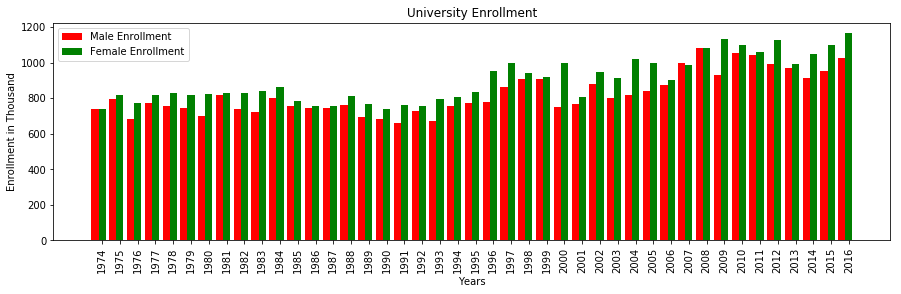

Twoy_males_count [247, 287, 210, 254, 230, 249, 255, 311, 263, 280, 252, 255, 284, 221, 284, 220, 230, 261, 268, 256, 286, 312, 279, 289, 354, 309, 288, 237, 288, 286, 288, 311, 331, 343, 408, 353, 478, 397, 436, 374, 301, 351, 383]
Foury_males_count [488, 508, 475, 518, 527, 494, 444, 505, 476, 440, 548, 498, 459, 524, 477, 472, 450, 398, 460, 414, 466, 462, 499, 571, 551, 596, 460, 529, 588, 512, 526, 527, 542, 655, 671, 575, 576, 644, 557, 594, 609, 600, 640]
Twoy_females_count [224, 290, 254, 294, 306, 304, 342, 314, 328, 288, 332, 267, 251, 278, 300, 287, 245, 304, 281, 278, 243, 246, 335, 340, 330, 300, 300, 262, 316, 288, 328, 330, 333, 367, 462, 460, 363, 400, 484, 334, 404, 396, 360]
Foury_females_count [515, 527, 518, 522, 519, 510, 479, 516, 500, 551, 530, 517, 503, 479, 513, 479, 494, 458, 471, 518, 561, 587, 614, 654, 608, 616, 695, 545, 630, 624, 690, 664, 567, 618, 618, 669, 733, 659, 642, 658, 644, 703, 804]


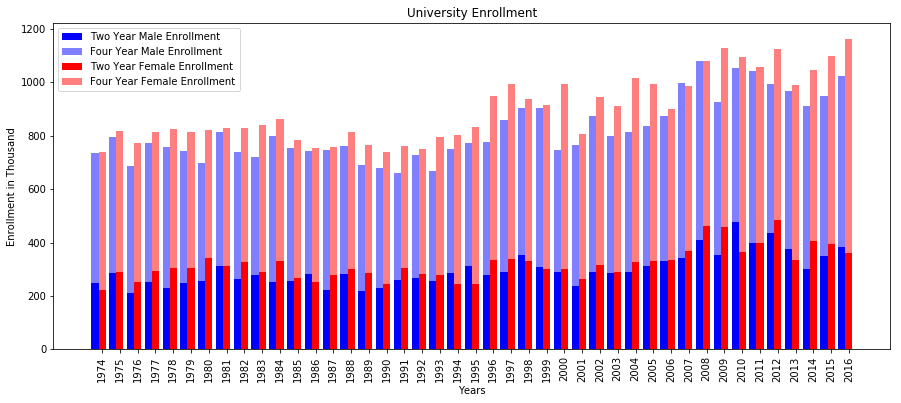

In [59]:
import MySQLdb
import matplotlib.pyplot as plt
import numpy as np

conn = MySQLdb.connect(host="localhost", user="mehtake", passwd="info501", db="sp18i501_5")
cursor = conn.cursor()
cursor.execute('SELECT year, males, females,Total_Male,Two_Year_Male,Four_Year_Male,\
Total_Female,Two_Year_Female,Four_Year_Female,\
ROUND(males * Total_Male/ 100) AS Total_males_count,\
ROUND(females * Total_Female/ 100) AS Total_females_count FROM university_enrollment_2 WHERE year > 1973');
data = cursor.fetchall()        #gives the resultset
cursor.close()

year = []
Total_males_count = []
Total_females_count = []
Twoy_males_count = []
Foury_males_count = []
Twoy_females_count = []
Foury_females_count = []

for row in data:
    year.append(row[0])
    Total_males_count.append(int(row[9]))
    Total_females_count.append(int(row[10]))
    Twoy_males_count.append(int((row[1] * row[4] / 100)))
    Foury_males_count.append(int((row[1] * row[5] / 100)))
    Twoy_females_count.append(int((row[2] * row[7] / 100)))
    Foury_females_count.append(int((row[2] * row[8] / 100)))


print("Data:")    
print(year)
print("Total_males_count",Total_males_count)
print("Total_females_count", Total_females_count)


####################################################

plt.close()
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
width = 0.4
years = np.arange(len(year))

rects1 = ax.bar(years, Total_males_count,width, color='r',label="Male Enrollment")
rects2 = ax.bar(years+width, Total_females_count,width, color='g',label="Female Enrollment")

ax.set_xlabel('Years')
ax.set_ylabel('Enrollment in Thousand')
ax.set_title("University Enrollment")
ax.set_xticks(years+width)
ax.set_xticklabels( [i for i in year],rotation =90)
ax.legend()
plt.show()

############################################

print("Twoy_males_count",Twoy_males_count)
print("Foury_males_count",Foury_males_count)
print("Twoy_females_count",Twoy_females_count)
print("Foury_females_count",Foury_females_count)
###########################################

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
width = 0.4
years = np.arange(len(year))

rects1 = ax.bar(years, Twoy_males_count,width, color='b',label="Two Year Male Enrollment")
rects2 = ax.bar(years, Foury_males_count,width, color='b',alpha = 0.5,label="Four Year Male Enrollment",
                bottom=Twoy_males_count)

rects3 = ax.bar(years+width, Twoy_females_count,width, color='r',label="Two Year Female Enrollment")
rects4 = ax.bar(years+width, Foury_females_count,width, color='r',alpha = 0.5,label="Four Year Female Enrollment",
                bottom=Twoy_females_count)

ax.set_xlabel('Years')
ax.set_ylabel('Enrollment in Thousand')
ax.set_title("University Enrollment")
ax.set_xticks(years+width)
ax.set_xticklabels( [i for i in year],rotation =90)
ax.legend()
plt.show()

